Alunos: Daniel de Paula, Gustavo Gurreiro e Mayara Cardoso Simões

# Classificação - k-Nearest Neighbour (kNN)

Inicialmente se fazem os imports necessários.

In [61]:
import numpy as np
import scipy.io as scipy
from scipy.stats import mode
import matplotlib.pyplot as plt

Dado um conjunto de dados, você quer construir um programa que prevê novos exemplos para uma classe. Por exemplo, dado um conjunto de dígitos escritos à mão, você quer construir um programa que reconhece automaticamente o CEP das cartas.

Implemente um classificador 1-NN usando a distância Euclidiana.

$$
d(p,q) = \sqrt{\sum_{i=1}^{n} (p_i - q_i)^2}
$$

Note que todos os conjuntos de dados usam vetores de linha. A função deve ser algo parecido com:

```python
def meuKnn(dadosTrain, rotuloTrain, dadosTeste, k)

# Para cada exemplo de teste

# Calcule a distância entre o exemplo de teste e os dados de treinamento

# Ordene as distâncias. A ordem iX de cada elemento ordenado é importante:

# [distOrdenada ind] = sort(...);

# O rótulo previsto corresponde ao rótulo do exemplo mais próximo (iX(1))
```

In [62]:
def d(p, q):
    soma = 0
    for i in range(len(p)):
        soma += (p[i] - q[i])**2
    return np.sqrt(soma)

def dist(dados_treino, dados_teste):
    matriz_distancia = np.zeros((len(dados_teste), len(dados_treino)))
    for i in range(len(dados_teste)):
        for j in range(len(dados_treino)):
            distancia = d(dados_teste[i], dados_treino[j])
            matriz_distancia[i, j] = distancia

    return matriz_distancia

def prever():
    pass

def meu_knn(dados_treino, rotulo_treino, dados_teste, k):
    matriz_distancia = dist(dados_treino, dados_teste)
    indices_ordenados = [np.argsort(linha) for linha in matriz_distancia]

    indices_rotulados = [[rotulo_treino[indice] for indice in indices] for indices in indices_ordenados]

    y_circunflexo = [mode(rotulos[:k])[0][0] for rotulos in indices_rotulados]

    return y_circunflexo

Para testar se você implementou a função corretamente, baixe o arquivo **grupoDados1.mat** - cada arquivo **.mat** contém 4 variáveis que são: **grupoTest, grupoTrain, testRots, trainRots**. Para baixar os arquivos **.mat** no Python você pode fazer o seguinte:

```python
import scipy.io as scipy

mat = scipy.loadmat('grupoDados1.mat')

grupoTest = mat['grupoTest']
```

In [63]:
mat = scipy.loadmat('grupoDados1.mat')
grupoTest = mat['grupoTest']
grupoTrain = mat['grupoTrain']
testRots = mat['testRots']
trainRots = mat['trainRots']

Então, verifique quantas classes foram previstas corretamente, isto é chamado de *acurácia (accuracy)*:

```python
rotuloPrevisto = meuKnn(grupoTrain, trainRots, grupoTest, 1);

estaCorreto = rotuloPrevisto == testRots;

numCorreto = sum(estaCorreto);

totalNum = length(testRots);

acurácia = numCorreto / totalNum
```

In [64]:
rotulo_previsto = meu_knn(grupoTrain, trainRots, grupoTest, 1)

def calcular_acuracia(rotulos_previsao, rotulos_teste):
    num_correto = 0
    for previsto, teste in zip(rotulos_previsao, rotulos_teste):
        if previsto == teste:
            num_correto += 1

    total_num = len(testRots)

    return num_correto / total_num

calcular_acuracia(rotulo_previsto, testRots)

0.96

A acurácia deve ser de 96%. Agora, vamos estender a função a um classificador k-NN:

```MATLAB
def meuKnn(dadosTrain, rotuloTrain, dadosTeste, k)

% Para cada exemplo de teste

% Calcule a distância entre o exemplo de teste e os dados de treinamento

% Ordene as distâncias. A ordem iX de cada elemento ordenado é importante:

% [distOrdenada ind] = sort(...);

% Obter os rótulos correspondentes aos exemplos mais próximos k

% Agora, a moda dos rótulos correspondentes são os rótulos previstos (você pode usar a função mode).
```

In [65]:
# A função já foi feita originalmente levando em consideração a moda

Teste novamente no conjunto de dados 1 (**grupoDados1.mat**) e utilize k = 10 para uma acurácia igual a 94%.

In [66]:
rotulos_previstos = meu_knn(grupoTrain, trainRots, grupoTest, 10)
acuracia = calcular_acuracia(rotulos_previstos, testRots)
acuracia

0.94

É sempre bom visualizar graficamente seus dados. Para fazer isso, crie a seguinte função:

```python
import matplotlib.pyplot as plt
def getDadosRotulo(dados, rotulos, rotulo, indice):
    ret = []
    for idx in range(0, len(dados)):
        if(rotulos[idx] == rotulo):
            ret.append(dados[idx][indice])
    return ret

def visualizaPontos(dados, rotulos, d1, d2):
    fig, ax = plt.subplots()
    ax.scatter(getDadosRotulo(dados, rotulos, 1, d1), getDadosRotulo(dados, rotulos, 1, d2), c='red' , marker='^')
    ax.scatter(getDadosRotulo(dados, rotulos, 2, d1), getDadosRotulo(dados, rotulos, 2, d2), c='blue' , marker='+')
    ax.scatter(getDadosRotulo(dados, rotulos, 3, d1), getDadosRotulo(dados, rotulos, 3, d2), c='green', marker='.')
    plt.show()
```


Nesta função, d1 e d2 denotam as dimensões que você deseja visualizar, isto é 1 e 2 respectivamente.

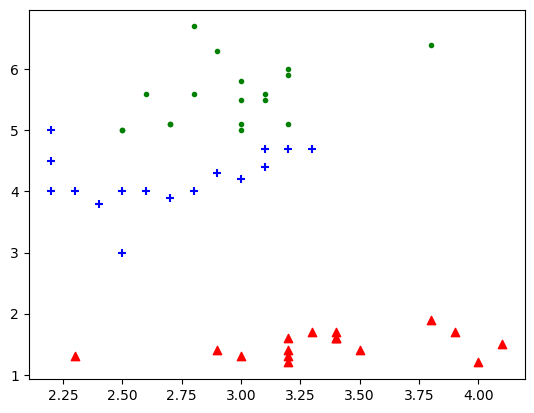

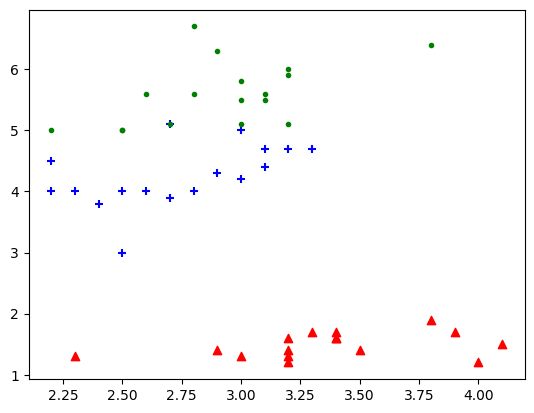

In [67]:
def obter_dados_rotulo(dados, rotulos, rotulo, indice):
    ret = []
    for idx in range(0, len(dados)):
        if rotulos[idx] == rotulo:
            ret.append(dados[idx][indice])
    return ret

def visualiza_pontos(dados, rotulos, d1, d2):
    fig, ax = plt.subplots()
    ax.scatter(obter_dados_rotulo(dados, rotulos, 1, d1), obter_dados_rotulo(dados, rotulos, 1, d2), c='red', marker='^')
    ax.scatter(obter_dados_rotulo(dados, rotulos, 2, d1), obter_dados_rotulo(dados, rotulos, 2, d2), c='blue', marker='+')
    ax.scatter(obter_dados_rotulo(dados, rotulos, 3, d1), obter_dados_rotulo(dados, rotulos, 3, d2), c='green', marker='.')
    plt.show()

visualiza_pontos(grupoTest, rotulos_previstos, 1, 2)
visualiza_pontos(grupoTest, testRots, 1, 2)

**Grupo de Dados 1**:
O **grupoDados1** é um conjunto de dados de flores. Para mais informações consulte: http://archive.ics.uci.edu/ml/datasets/Iris .

**Q1.1. Qual é a acurácia máxima que você consegue da classificação?**
98% usando $k=3$

In [68]:
# 1.1
def calcular_maior_acuracia(grupo_train, train_rots, grupo_test, test_rots):
    maior_acuracia = -float('inf')
    for i in range(1, (len(grupo_train)+1)//2):
        rotulos_previstos = meu_knn(grupo_train, train_rots, grupo_test, i)
        acuracia = calcular_acuracia(rotulos_previstos, test_rots)
        print(acuracia, i)
        if acuracia > maior_acuracia:
            maior_acuracia = acuracia
    print('Maior acurácia:', maior_acuracia)

calcular_maior_acuracia(grupoTrain, trainRots, grupoTest, testRots)

0.96 1
0.96 2
0.98 3
0.98 4
0.96 5
0.98 6
0.96 7
0.94 8
0.96 9
0.94 10
0.94 11
0.94 12
0.94 13
0.94 14
0.96 15
0.94 16
0.94 17
0.94 18
0.94 19
0.94 20
0.94 21
0.96 22
0.96 23
0.96 24
0.96 25
0.96 26
0.96 27
0.94 28
0.94 29
0.92 30
0.92 31
0.92 32
0.92 33
0.9 34
0.88 35
0.88 36
0.88 37
0.88 38
0.88 39
0.88 40
0.88 41
0.9 42
0.88 43
0.86 44
0.86 45
0.88 46
0.9 47
0.9 48
0.9 49
Maior acurácia: 0.98


**Q1.2. É necessário ter todas as características (atributos) para obter a acurácia máxima para esta classificação?**

In [69]:
# 1.2
print("Acurácia sem 'petal width':")
calcular_maior_acuracia(grupoTrain[:,:3], trainRots, grupoTest[:,:3], testRots)

print("Acurácia sem 'petal width' e 'petal length':")
calcular_maior_acuracia(grupoTrain[:,:2], trainRots, grupoTest[:,:2], testRots)

print("Acurácia sem 'sepal width' e 'petal width':")
calcular_maior_acuracia(grupoTrain[:,::2], trainRots, grupoTest[:,::2], testRots)

Acurácia sem 'petal width':
0.92 1
0.94 2
0.96 3
0.96 4
0.96 5
0.96 6
0.96 7
0.94 8
0.96 9
0.96 10
0.96 11
0.96 12
0.94 13
0.94 14
0.94 15
0.92 16
0.92 17
0.9 18
0.92 19
0.92 20
0.92 21
0.92 22
0.92 23
0.9 24
0.9 25
0.9 26
0.9 27
0.88 28
0.88 29
0.9 30
0.9 31
0.88 32
0.86 33
0.86 34
0.86 35
0.86 36
0.86 37
0.84 38
0.84 39
0.84 40
0.84 41
0.84 42
0.82 43
0.82 44
0.82 45
0.82 46
0.82 47
0.82 48
0.82 49
Maior acurácia: 0.96
Acurácia sem 'petal width' e 'petal length':
0.68 1
0.64 2
0.72 3
0.68 4
0.72 5
0.72 6
0.76 7
0.72 8
0.76 9
0.78 10
0.74 11
0.76 12
0.74 13
0.72 14
0.74 15
0.74 16
0.74 17
0.72 18
0.72 19
0.78 20
0.74 21
0.76 22
0.76 23
0.76 24
0.76 25
0.76 26
0.76 27
0.76 28
0.76 29
0.76 30
0.76 31
0.76 32
0.76 33
0.76 34
0.76 35
0.76 36
0.76 37
0.76 38
0.76 39
0.76 40
0.76 41
0.72 42
0.72 43
0.72 44
0.74 45
0.76 46
0.76 47
0.76 48
0.72 49
Maior acurácia: 0.78
Acurácia sem 'sepal width' e 'petal width':
0.92 1
0.96 2
0.96 3
0.98 4
0.96 5
0.96 6
0.96 7
0.96 8
0.96 9
0.94 10
0.96 11
0.9

Q1.2: Como demonstrado na execução anterior é possível chegar à mesma acurácia de 98% com $k=4$ apenas com os comprimentos das pétalas e das sépalas, as larguras não são necessárias.

## Grupo de Dados 2:
O Grupo de Dados 2 é um problema que visa prever a origem do vinho em base aos seus componentes químicos. As características são:

1) Álcool

2) Ácido málico

3) Cinzas

4) Alcalinidade das cinzas

5) Magnésio

6) Fenóis totais

7) Flavonóides

8) Fenóis não flavonóides

9) Proantocianinas

10) Intensidade de cor

11) Tonalidade

12) OD280 / OD315 de vinhos diluídos

13) Prolina

In [70]:
mat = scipy.loadmat('grupoDados2.mat')
grupoTest = mat['grupoTest']
grupoTrain = mat['grupoTrain']
testRots = mat['testRots']
trainRots = mat['trainRots']

**Q2.1: Aplique seu kNN a este problema. Qual é a sua acurácia de classificação?** 78%

In [71]:
calcular_maior_acuracia(grupoTrain, trainRots, grupoTest, testRots)

0.6833333333333333 1
0.65 2
0.6166666666666667 3
0.6833333333333333 4
0.7 5
0.7166666666666667 6
0.7333333333333333 7
0.7 8
0.75 9
0.7833333333333333 10
0.75 11
0.75 12
0.7666666666666667 13
0.7666666666666667 14
0.75 15
0.7666666666666667 16
0.75 17
0.75 18
0.75 19
0.75 20
0.75 21
0.7333333333333333 22
0.7333333333333333 23
0.7166666666666667 24
0.7166666666666667 25
0.7333333333333333 26
0.7333333333333333 27
0.7166666666666667 28
0.7166666666666667 29
0.7166666666666667 30
0.7333333333333333 31
0.7166666666666667 32
0.75 33
0.7333333333333333 34
0.7333333333333333 35
0.7333333333333333 36
0.7166666666666667 37
0.7333333333333333 38
0.7333333333333333 39
0.7166666666666667 40
0.7166666666666667 41
0.7166666666666667 42
0.7166666666666667 43
0.7166666666666667 44
0.7166666666666667 45
0.7333333333333333 46
0.7166666666666667 47
0.7166666666666667 48
0.7166666666666667 49
0.7166666666666667 50
0.7166666666666667 51
0.7166666666666667 52
0.7166666666666667 53
0.7 54
0.7166666666666667 5

Método para normalizar os dados:

In [72]:
def normalizar_valores(valores):
    minimo = min(valores)
    maximo = max(valores)
    return  [(valor-minimo)/(maximo-minimo) for valor in valores]

In [73]:
def transpor_matriz(matriz):
    return [coluna for coluna in zip(*matriz)]

def normalizacao(grupo):
    return transpor_matriz([normalizar_valores(dados) for dados in zip(*grupo)])

In [74]:
grupo_test_normalizado  = normalizacao(grupoTest)
grupo_train_normalizado = normalizacao(grupoTrain)

In [75]:
calcular_maior_acuracia(grupo_train_normalizado, trainRots, grupo_test_normalizado, testRots)

0.9833333333333333 1
0.9666666666666667 2
0.9833333333333333 3
1.0 4
0.9833333333333333 5
0.9666666666666667 6
0.9833333333333333 7
1.0 8
1.0 9
0.9833333333333333 10
0.9833333333333333 11
0.9833333333333333 12
0.9833333333333333 13
0.9833333333333333 14
0.9833333333333333 15
0.9833333333333333 16
0.9833333333333333 17
0.9833333333333333 18
0.9833333333333333 19
0.9833333333333333 20
0.9833333333333333 21
0.9833333333333333 22
0.9833333333333333 23
0.9833333333333333 24
0.9833333333333333 25
0.9833333333333333 26
0.9833333333333333 27
0.9833333333333333 28
0.9833333333333333 29
0.9833333333333333 30
0.9833333333333333 31
0.9833333333333333 32
0.9833333333333333 33
0.9833333333333333 34
0.9833333333333333 35
0.9833333333333333 36
0.9833333333333333 37
0.9833333333333333 38
0.9833333333333333 39
0.9833333333333333 40
0.9833333333333333 41
0.9833333333333333 42
0.9833333333333333 43
0.9833333333333333 44
0.9833333333333333 45
0.9833333333333333 46
0.9833333333333333 47
0.9833333333333333 4

**Q2.2: A acurácia pode ser igual a 98% com o kNN. Descubra por que o resultado atual é muito menor. Ajuste o conjunto de dados ou k de tal forma que a acurácia se torne 98% e explique o que você fez e por quê.**

Após serem normalizados a acurácia pode ser 98% $k=1$ ou ainda chegar até 100% com $k = 4$

## Grupo de Dados 3:

In [76]:
mat = scipy.loadmat('grupoDados3.mat')
grupoTest = mat['grupoTest']
grupoTrain = mat['grupoTrain']
testRots = mat['testRots']
trainRots = mat['trainRots']

**Q3.1: Aplique o kNN ao problema usando k = 1. Qual é a acurácia na classificação?** 62%

In [77]:
calcular_acuracia(meu_knn(grupoTrain, trainRots, grupoTest, 1), testRots)

0.62

In [78]:
grupo_test_normalizado  = normalizacao(grupoTest)
grupo_train_normalizado = normalizacao(grupoTrain)

calcular_maior_acuracia(grupo_train_normalizado, trainRots, grupo_test_normalizado, testRots)

0.64 1
0.74 2
0.76 3
0.76 4
0.86 5
0.84 6
0.88 7
0.84 8
0.9 9
0.88 10
0.9 11
0.88 12
0.9 13
0.92 14
0.9 15
0.92 16
0.9 17
0.92 18
0.92 19
0.92 20
0.92 21
0.9 22
0.92 23
0.92 24
0.94 25
0.94 26
0.94 27
0.92 28
0.9 29
0.9 30
0.92 31
0.92 32
0.92 33
0.92 34
0.94 35
0.94 36
0.94 37
0.94 38
0.9 39
0.9 40
0.92 41
0.92 42
0.92 43
0.92 44
0.92 45
0.9 46
0.9 47
0.88 48
0.88 49
Maior acurácia: 0.94


**Q3.2: A acurácia pode ser igual a 92% com o kNN. Descubra por que o resultado atual é muito menor. Ajuste o conjunto de dados ou k de tal forma que a acurácia se torne 92% e explique o que você fez e por quê.**

Foi necesário normalizar os valores, após buscar pela maior acurácia, conseguiu-se chegar ao valor de 92% com $k=14$, mas foi possível chegar a 94% com $k=25$.

## Grupo de Dados 4:

OBS: Os nomes das variáveis estão diferentes neste dataset:
grupoTest=testSet;
grupoTrain=trainSet;
testRots=testLabs;
trainRots=trainLabs;

In [79]:
mat = scipy.loadmat('grupoDados4.mat')
grupoTest = mat['testSet']
grupoTrain = mat['trainSet']
testRots = mat['testLabs']
trainRots = mat['trainLabs']

**Q4.1: Aplique seu algoritmo K-NN ao problema. Qual é a sua acurácia de classificação?** $\approx$77%

In [80]:
calcular_maior_acuracia(grupoTrain, trainRots, grupoTest, testRots)

0.7166666666666667 1
0.7333333333333333 2
0.6666666666666666 3
0.7666666666666667 4
0.75 5
0.75 6
0.75 7
0.7166666666666667 8
0.7333333333333333 9
0.7666666666666667 10
0.7166666666666667 11
0.7666666666666667 12
0.75 13
0.75 14
0.75 15
0.75 16
0.75 17
0.75 18
0.75 19
0.75 20
0.75 21
0.7333333333333333 22
0.7333333333333333 23
0.7333333333333333 24
0.7333333333333333 25
0.7333333333333333 26
0.7333333333333333 27
0.7166666666666667 28
0.7166666666666667 29
0.7166666666666667 30
0.7333333333333333 31
0.7166666666666667 32
0.75 33
0.7333333333333333 34
0.7333333333333333 35
0.7333333333333333 36
0.7166666666666667 37
0.7166666666666667 38
0.7333333333333333 39
0.7333333333333333 40
0.7333333333333333 41
0.7333333333333333 42
0.7166666666666667 43
0.7166666666666667 44
0.7166666666666667 45
0.7166666666666667 46
0.7166666666666667 47
0.7166666666666667 48
0.7166666666666667 49
0.7166666666666667 50
0.7166666666666667 51
0.7166666666666667 52
0.7166666666666667 53
0.7 54
0.7166666666666667

**Q4.2: A acurácia pode chegar a 92% com o K-NN. Descubra por que o resultado atual é muito menor. Ajuste o conjunto de dados ou o valor de k de forma que a acurácia atinja 92% e explique o que você fez e por quê. Observe que, desta vez, há mais de um problema...**

In [81]:
grupo_test_normalizado  = normalizacao(grupoTest[:, :3])
grupo_train_normalizado = normalizacao(grupoTrain[:, :3])

calcular_maior_acuracia(grupo_train_normalizado, trainRots, grupo_test_normalizado, testRots)

0.85 1
0.8833333333333333 2
0.9333333333333333 3
0.9 4
0.9333333333333333 5
0.9333333333333333 6
0.9166666666666666 7
0.9 8
0.9166666666666666 9
0.95 10
0.95 11
0.95 12
0.95 13
0.9666666666666667 14
0.9166666666666666 15
0.9333333333333333 16
0.9333333333333333 17
0.95 18
0.95 19
0.95 20
0.95 21
0.9166666666666666 22
0.9333333333333333 23
0.9166666666666666 24
0.9333333333333333 25
0.9166666666666666 26
0.9166666666666666 27
0.9166666666666666 28
0.9166666666666666 29
0.9166666666666666 30
0.9333333333333333 31
0.9333333333333333 32
0.9333333333333333 33
0.9333333333333333 34
0.9333333333333333 35
0.9166666666666666 36
0.8833333333333333 37
0.8833333333333333 38
0.8833333333333333 39
0.8833333333333333 40
0.8833333333333333 41
0.85 42
0.85 43
0.85 44
0.8333333333333334 45
0.8 46
0.8166666666666667 47
0.7833333333333333 48
0.7666666666666667 49
0.7666666666666667 50
0.7333333333333333 51
0.7333333333333333 52
0.7333333333333333 53
0.7333333333333333 54
0.7166666666666667 55
0.7166666666

Q4.2: Caso não se utilize a última coluna e se normalize os dados a acurácia é de 92% com $k=7$, porém, pode-se alcançar uma acurácia ainda maior de $\approx$ 97% usando um $k=14$.